# Beginning
This is the first part of the code here we load the path where data exists and assigns the labels for the categories. This problem consist two categories namely Normal and Pneumonia Here we assign 0-Normal 1-Pneumonia

In [22]:
import cv2 as cv
import os

dataPath="C:\\Users\\ELCOT\\Pneumonia Detection using Deep learning\\Chestimages"
Categories=os.listdir(dataPath)

labels = [i for i in range(len(Categories))]
labeldict={}
for i in range(len(Categories)):
    labeldict[Categories[i]]=labels[i]
print(Categories)
print(labels)
print(labeldict)

['Normal', 'Pneumonia']
[0, 1]
{'Normal': 0, 'Pneumonia': 1}


# Preparing the Images
In this part of the code we prepare the images for processing. We read,resize the images convert them to gray and append them to the empty python list. Here we add a exception to remove the corupted images.


In [23]:
imageSize=128
Dataset=[]

for Category in Categories:
    folderPath=os.path.join(dataPath,Category)
    #print(folderPath)
    imageNames=os.listdir(folderPath)
    #print(imageNames)
    
    for imageName in imageNames:
        imagePath=os.path.join(folderPath,imageName)
         #print(imagePath)
        image=cv.imread(imagePath)
        
        try:
            grayImage = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
            resized=cv.resize(grayImage,(imageSize,imageSize))
            Dataset.append([resized,labeldict[Category]])
            
        except Exception as e:
            print(e)

# Shuffling the dataset
The first half of the dataset contains normal images, the second half pneumonia images. Shuffling is necessary here, otherwise the Neural Network will not see the two categories in the initial part of the training.

In [27]:
print(len(Dataset))
from random import shuffle

shuffle(Dataset)

5933


Here we append the data python list from the features,here the feature is the resized image and target as the label.

In [28]:
data=[]
target=[]

for feature,label in Dataset:
    
    data.append(feature)
    target.append(label)

# data and target preprocessing
We convert the data and target into a numpy array to further processing.
In data we divide all pixels by 255 to get all pixel values between 0-1. We reshape the data because the CNNs require 4 dimensional input, therefore we add the dimension 1, this is to represent grayscale image, for color images you may have to use 3. And we convert the target using np_utils.to_categorical to make the categorical representation.

In [29]:
import numpy as np
data=np.array(data)/255
print(data.shape)
data=np.reshape(data,(data.shape[0],imageSize,imageSize,1))
target=np.array(target)
#print(target)
#print(data.shape)
print(data.shape)
print(target.shape)
from keras.utils import np_utils

newTarget=np_utils.to_categorical(target)
#print(newTarget)

(5933, 128, 128)
(5933, 128, 128, 1)
(5933,)


# Saving data & the target

In [30]:
np.save('dataChestXray',data)
np.save('targetChestXray',newTarget)


# Loading the saved data & target

In [31]:
import numpy as np

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')
print(data.shape[1:])

(128, 128, 1)


# CNN Architecture

In [32]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Splitting the data and target

In [33]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

# Training the data

In [34]:
history=model.fit(train_data,train_target,epochs=8)

Epoch 1/8
149/149 [==============================] - 268s 1s/step - loss: 0.6165 - accuracy: 0.7182
Epoch 2/8
149/149 [==============================] - 199s 1s/step - loss: 0.3156 - accuracy: 0.8615
Epoch 3/8
149/149 [==============================] - 196s 1s/step - loss: 0.2908 - accuracy: 0.8872
Epoch 4/8
149/149 [==============================] - 196s 1s/step - loss: 0.2538 - accuracy: 0.9039
Epoch 5/8
149/149 [==============================] - 193s 1s/step - loss: 0.2294 - accuracy: 0.9159
Epoch 6/8
149/149 [==============================] - 188s 1s/step - loss: 0.2073 - accuracy: 0.9314
Epoch 7/8
149/149 [==============================] - 188s 1s/step - loss: 0.1953 - accuracy: 0.9309
Epoch 8/8
149/149 [==============================] - 192s 1s/step - loss: 0.1950 - accuracy: 0.9379


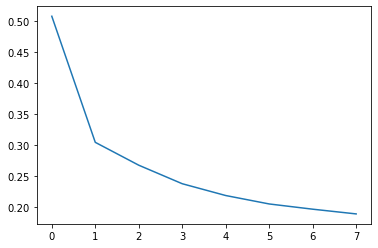

In [35]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])


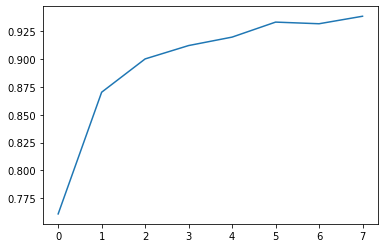

In [36]:
plt.plot(history.history['accuracy'])


In [37]:
print(model.evaluate(test_data,test_target))


38/38 [==============================] - 22s 448ms/step - loss: 0.1844 - accuracy: 0.9385
[0.18439579010009766, 0.9385004043579102]


In [38]:
model.save("Pnemonia_predictions_using_chest_xray_99.20.h5")

# Loading the trained cnn

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

data=np.load('dataChestXray.npy')
target=np.load('targetChestXray.npy')

def loadingCNN():
    model=Sequential()

    model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())

    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model.load_weights('Pnemonia_predictions_using_chest_xray_99.20.h5')
    return model

loadingCNN()

In [ ]:
import cv2 as cv
import os
  
testPath='C:\\Users\\ELCOT\\Downloads\\archive\\Coronahack-Chest-XRay-Dataset\\test'
imageNames=os.listdir(testPath)
model=loadingCNN()
category={0:'Normal',1:'Pnemonia'}

for imageName in imageNames:
    imagePath=os.path.join(testPath,imageName)
    image=cv.imread(imagePath)
    grayImage=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    resized=cv.resize(grayImage,(128,128))
    normalized=resized/255
    reshaped=np.reshape(normalized,(1,128,128,1))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    prob=np.max(result,axis=1)[0]
    prob=round(prob,2)*100
#image[:50,:]=[0,255,0]
    cv.putText(image,str(category[label]),(100,100),cv.FONT_HERSHEY_SIMPLEX,3,(255,255,255),2)
    cv.putText(image,str(prob),(100,200),cv.FONT_HERSHEY_SIMPLEX,3,(255,255,255),2)
    cv.imshow('LIVE',image)
    cv.waitKey(5000)
    print(result)